This notebook is a submission to Capital One Data scientist interview project. 
- the previous run results are shown. You do not need to run the notebook to see results (suggested)
- You can click on "cell-> run all" to run by yourself. it takes about 10 minutes. 

## Question 1: Load
Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format, can be found at https://github.com/CapitalOneRecruiting/DS

In [5]:
# !pip3 install pandas

In [6]:
!pip install requests

     |████████████████████████████████| 61kB 2.8MB/s eta 0:00:01
     |████████████████████████████████| 143kB 9.7MB/s eta 0:00:01
     |████████████████████████████████| 61kB 18.9MB/s eta 0:00:01
     |████████████████████████████████| 153kB 14.6MB/s eta 0:00:01


In [3]:
# import requests, zipfile, io,json

# with zipfile.ZipFile('transactions.zip', 'r') as myzip:
#     myzip.write('eggs.txt')

In [8]:
%%time
import requests, zipfile, io,json
import pandas as pd
import numpy as np
path = 'https://github.com/CapitalOneRecruiting/DS/blob/master/transactions.zip'
r = requests.get(path)
with zipfile.ZipFile(io.BytesIO(r.content)) as myzip:
    with myzip.open('transactions.txt') as myfile:
        print(myfile.read())
        df = pd.DataFrame([json.loads(line) for line in myfile])

BadZipFile: File is not a zip file

In [26]:
df.head()

NameError: name 'df' is not defined

In [2]:
!pwd

/Users/yuleinku/Desktop/project


In [2]:
import requests
import io
import zipfile
def download_extract_zip(url):
    """
    Download a ZIP file and extract its contents in memory
    yields (filename, file-like object) pairs
    """
    response = requests.get(url)
    print('Good')
    with zipfile.ZipFile(io.BytesIO(response.content)) as thezip:
#         print(thezip)
#         for zipinfo in thezip.infolist():
#             with thezip.open(zipinfo) as thefile:
#                 yield zipinfo.filename, thefile
        with thezip.open('transactions.txt') as thefile:
            yield zipinfo.filename, thefile

In [7]:
url = 'https://github.com/CapitalOneRecruiting/DS/blob/master/transactions.zip'

download_extract_zip(path)

<generator object download_extract_zip at 0x7ff0c828f888>

In [8]:
!pwd

/Users/yuleinku/Desktop/project


In [10]:
# downloading with requests
 
# import the requests library
import requests
 
 
# download the file contents in binary format
r = requests.get(url)
 
# open method to open a file on your system and write the contents
with open("a.txt", "wb") as code:
    code.write(r.content)

### Q1A. Please describe the structure of the data. Number of records and fields in each record?

the data is in a txt file, each row contains information on one transaction in json format (similar to python dictionary key-value pair)

In [2]:
print('There are %7d number of records and there are %4d fields in each record' % (df.shape[0], df.shape[1]))

There are  641914 number of records and there are   29 fields in each record


take a glimpse on the data

In [3]:
df[df.columns[:10]].sample(5)

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate
267501,413448123,2015-09-09,US,9398.87,944,7659,True,20000.0,10601.13,09/2020
200225,972633729,2015-11-01,US,263.56,290,7389,True,2500.0,2236.44,06/2020
347386,422259014,2014-12-20,US,3446.52,385,2521,True,20000.0,16553.48,07/2026
490350,907531151,2010-11-22,US,13720.29,192,9014,False,15000.0,1279.71,03/2030
371432,585310900,2015-06-06,US,996.10,518,5232,False,2500.0,1503.90,04/2026


In [4]:
df[df.columns[10:20]].sample(5)

,customerId,dateOfLastAddressChange,echoBuffer,enteredCVV,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCity,merchantCountryCode,merchantName
104237,700641128,2013-03-15,,455,False,False,fastfood,,US,Pizza Hut #288835
589322,423667120,2016-01-20,,622,False,False,personal care,,US,Universe Massage #84171
554542,914905284,2016-06-12,,791,False,False,auto,,US,Shell Tire
313482,982360792,2016-10-24,,421,False,False,cable/phone,,US,Sprint PCS #394911
64778,335334122,2015-10-30,,465,False,False,online_retail,,US,walmart.com


In [5]:
df[df.columns[20:]].sample(5)

,merchantState,merchantZip,posConditionCode,posEntryMode,posOnPremises,recurringAuthInd,transactionAmount,transactionDateTime,transactionType
316438,,,08,05,,,142.00,2016-01-14T04:19:09,PURCHASE
327254,,,01,02,,,36.78,2016-10-28T23:32:37,PURCHASE
531146,,,01,09,,,333.27,2016-02-27T12:20:06,PURCHASE
344309,,,01,02,,,205.33,2016-11-10T16:52:36,PURCHASE
326422,,,01,05,,,20.82,2016-02-15T20:10:57,PURCHASE


it seems all the NA values are stored as empty strings, so we will replace them with np.nan and check their statistic

In [3]:
import numpy as np
df.replace('', np.nan, inplace=True)
df.isnull().sum()

accountNumber                    0
accountOpenDate                  0
acqCountry                    3913
availableMoney                   0
cardCVV                          0
cardLast4Digits                  0
cardPresent                      0
creditLimit                      0
currentBalance                   0
currentExpDate                   0
customerId                       0
dateOfLastAddressChange          0
echoBuffer                  641914
enteredCVV                       0
expirationDateKeyInMatch         0
isFraud                          0
merchantCategoryCode             0
merchantCity                641914
merchantCountryCode            624
merchantName                     0
merchantState               641914
merchantZip                 641914
posConditionCode               287
posEntryMode                  3345
posOnPremises               641914
recurringAuthInd            641914
transactionAmount                0
transactionDateTime              0
transactionType     

let check the data types of all fields. Convert them to their appropriate column types

In [7]:
df.dtypes

accountNumber                object
accountOpenDate              object
acqCountry                   object
availableMoney              float64
cardCVV                      object
cardLast4Digits              object
cardPresent                    bool
creditLimit                 float64
currentBalance              float64
currentExpDate               object
customerId                   object
dateOfLastAddressChange      object
echoBuffer                  float64
enteredCVV                   object
expirationDateKeyInMatch       bool
isFraud                        bool
merchantCategoryCode         object
merchantCity                float64
merchantCountryCode          object
merchantName                 object
merchantState               float64
merchantZip                 float64
posConditionCode             object
posEntryMode                 object
posOnPremises               float64
recurringAuthInd            float64
transactionAmount           float64
transactionDateTime         

In [4]:
for col in ['accountNumber', 'cardCVV','cardLast4Digits','enteredCVV']:
    df[col] = df[col].astype(int)
    
for col in ['accountOpenDate','dateOfLastAddressChange']:
    df[col] = pd.to_datetime(df[col], format = "%Y-%M-%d")
    
for col in ['currentExpDate']:
    df[col] = pd.to_datetime(df[col], format = "%M/%Y")
    
for col in ['transactionDateTime']:
    df[col] = pd.to_datetime(df[col], format = "%Y-%m-%dT%H:%M:%S")
    
for col in ['merchantCategoryCode', 'posConditionCode','posEntryMode','transactionType','posEntryMode']:
    df[col] = df[col].astype('category')

### Q1b Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.

In [9]:
categorical_columns = ['accountNumber','cardCVV','cardLast4Digits','enteredCVV','acqCountry','cardPresent','customerId',
                      'enteredCVV','expirationDateKeyInMatch','isFraud','merchantCategoryCode','transactionType']
for col in categorical_columns:
    print(col)
    na_count, unique_count = df[col].isnull().sum(), len(set(df[col]))
    print("There are %5d number of NA values" % na_count)
    print("There are %5d number of unique values" % unique_count)
    if unique_count < 10:
        print("top 5 values are: ")
        print(df[col].value_counts()[:5])
    print()

accountNumber
There are     0 number of NA values
There are  5000 number of unique values

cardCVV
There are     0 number of NA values
There are   899 number of unique values

cardLast4Digits
There are     0 number of NA values
There are  5134 number of unique values

enteredCVV
There are     0 number of NA values
There are   980 number of unique values

acqCountry
There are  3913 number of NA values
There are     5 number of unique values
top 5 values are: 
US     632303
MEX      2626
CAN      1870
PR       1202
Name: acqCountry, dtype: int64

cardPresent
There are     0 number of NA values
There are     2 number of unique values
top 5 values are: 
False    340453
True     301461
Name: cardPresent, dtype: int64

customerId
There are     0 number of NA values
There are  5000 number of unique values

enteredCVV
There are     0 number of NA values
There are   980 number of unique values

expirationDateKeyInMatch
There are     0 number of NA values
There are     2 number of unique values


In [10]:
continous_columns = ['availableMoney','creditLimit','currentBalance','accountOpenDate','currentExpDate',
                     'dateOfLastAddressChange','transactionAmount']
for col in continous_columns:
    print(col, ":")
    print("There are %5d number of NA values" % df[col].isnull().sum())
    print("minimum value is: ", df[col].min())
    print("maxmium value is: ", df[col].max())
    if "date" not in col.lower():
        print("median  value is: ", df[col].median())
        print("mean    value is: ", df[col].mean())
    print()

availableMoney :
There are     0 number of NA values
minimum value is:  -1244.93
maxmium value is:  50000.0
median  value is:  3578.165
mean    value is:  6652.828572659459

creditLimit :
There are     0 number of NA values
minimum value is:  250.0
maxmium value is:  50000.0
median  value is:  7500.0
mean    value is:  10697.210607651492

currentBalance :
There are     0 number of NA values
minimum value is:  0.0
maxmium value is:  47496.5
median  value is:  2151.86
mean    value is:  4044.3820349922103

accountOpenDate :
There are     0 number of NA values
minimum value is:  1985-01-25 00:12:00
maxmium value is:  2015-01-31 00:12:00

currentExpDate :
There are     0 number of NA values
minimum value is:  2018-01-01 00:05:00
maxmium value is:  2032-01-01 00:01:00

dateOfLastAddressChange :
There are     0 number of NA values
minimum value is:  1985-01-25 00:12:00
maxmium value is:  2016-01-31 00:10:00

transactionAmount :
There are     0 number of NA values
minimum value is:  0.0
maxmi

## Question 2: Plot
### Q2A: Plot a histogram of the processed amounts of each transaction, the transactionAmount column.


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001875DBC4B70>]],
      dtype=object)

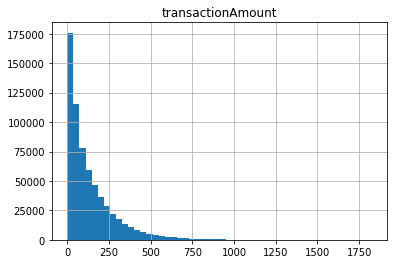

In [12]:
df.hist(column='transactionAmount', bins=50)

The plot is concentrated to the left. let us zoom in.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001875DBE85F8>]],
      dtype=object)

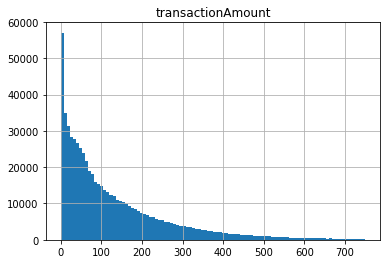

In [13]:
df[df['transactionAmount'] < 750].hist(column='transactionAmount', bins=100)

### Q2B: Report any structure you find and any hypotheses you have about that structure.
Answer: There is a big peak near 0. This might due to a large amount of zero dollar transactions (address verification for example). The general shape looks like a power-law or exponential decay. We can try to fit the histogram by power_law or exponential decay and see which one describes the data better.

## Question 3: Data Wrangling - Duplicate Transactions
You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span. Another example is a reversed transaction, where a purchase is followed by a reversal.

Can you programmatically identify duplicated and reversed transactions?

Did you find anything interesting about either of these transaction types?

What share of transactions (both number of transactions and the dollar amount) do you estimate for the duplicated and reversed transaction types that you identified? In a multi-swipe transaction, please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts.

In [5]:
%%time
count_id, count_duplicates, count_reversals, count_subscriptons,count_transactions = 0, 0, 0, 0, 0
dollar_duplicates, dollar_reversals, dollar_total = 0, 0, 0
print_details = True
for pid, df_per_id in df.groupby(['accountNumber']):  # group by account number
    count_id += 1
    if count_id % 1000 == 5: print("The number of loans processed", count_id)
    dollar_total += df_per_id['transactionAmount'].sum()
    count_transactions += df_per_id.shape[0]
    for group, df_per_per_category in df_per_id.groupby(['merchantName','transactionAmount']): 
        # candidates for reversal/duplicates transactions if merchantname and amount are the same
        if df_per_per_category.shape[0] > 1:
            if df_per_per_category.at[df_per_per_category.index[-1], 'transactionType'] == 'REVERSAL':
                count_reversals += 1
                dollar_reversals += group[1]
                if df_per_per_category.shape[0] > 3 and print_details:
                    # this invloves both reversal and duplicated transactions and is rare ( so they are ignored for now)
                    print("This is an example of both reversal and other things")
                    print("accountID", pid, group,count_id)
                    print(df_per_per_category[['transactionDateTime','availableMoney','isFraud','transactionType']])
                    print()
                if count_reversals % 100 == 5 and print_details:
                    print("This is an example of REVERSALS:")
                    print("accountID", pid, group,count_id)
                    print(df_per_per_category[['transactionDateTime','availableMoney','isFraud','transactionType']])
                    print()
            elif len(set(df_per_per_category['transactionDateTime'].apply(lambda x: x.day))) == 1:
            # all transactions happened on the same day
                count_duplicates += 1
                dollar_duplicates += (df_per_per_category.shape[0] - 1) * group[1]
                if  count_duplicates % 100 == 5 and print_details:
                    print("This is an example of DUPLICATES:")
                    print("accountID", pid, group,count_id)
                    print(df_per_per_category[['transactionDateTime','availableMoney','isFraud','transactionType']])
                    print()
            elif set(df_per_per_category['transactionType']) == set(["PURCHASE"]):
                # this should be periodic transactions
                count_subscriptons += 1
                if count_subscriptons % 100 == 5 and print_details:
                    print("This is an example of periodic subscription:")
                    print("accountID", pid, group,count_id)
                    print(df_per_per_category[['transactionDateTime','availableMoney','isFraud','transactionType']])
                    print()


This is an example of REVERSALS:
accountID 100973869 ('Uber', 124.63) 3
       transactionDateTime  availableMoney  isFraud transactionType
121998 2016-02-25 19:01:38          658.25    False        PURCHASE
121999 2016-02-29 15:42:21          533.62    False        REVERSAL

The number of loans processed 5
This is an example of periodic subscription:
accountID 101548993 ('netflix.com', 18.710000000000001) 5
       transactionDateTime  availableMoney  isFraud transactionType
520261 2016-06-10 20:55:01         7428.25    False        PURCHASE
520264 2016-07-12 11:22:49         7441.30    False        PURCHASE
520267 2016-08-12 13:51:55         7500.00    False        PURCHASE
520271 2016-09-13 06:18:55         7426.32    False        PURCHASE
520274 2016-10-15 03:51:26         7431.30    False        PURCHASE
520277 2016-11-14 08:01:34         7441.30    False        PURCHASE
520280 2016-12-16 00:56:36         7441.30    False        PURCHASE

This is an example of DUPLICATES:
accountID

KeyboardInterrupt: 

In [15]:
print("The number of                accounts:", count_id)
print("The percentage of duplicated transactions by  count is %5.2f" % (100*count_duplicates/count_transactions))
print("The percentage of duplicated transactions by amount is %5.2f" % (100*dollar_duplicates/dollar_total))
print("The percentage of reversed   transactions by  count is %5.2f" % (100*count_reversals/count_transactions))
print("The percentage of reversed   transactions by amount is %5.2f" % (100*dollar_reversals/dollar_total))

The number of                accounts: 5000
The percentage of duplicated transactions by  count is  0.88
The percentage of duplicated transactions by amount is  1.01
The percentage of reversed   transactions by  count is  2.25
The percentage of reversed   transactions by amount is  2.44


### some insights:
1. reversal transactions: can be found through tranaction type and the corresponding purchase can be found using the same account number, merchant  name and purchase amount.
- duplicated tranactions: can be found if there are multiple tranactions in a single day for the same acoount number, merchant name and purchase amount
- periodic transactions: They look like duplicated transactions but their transactions do not happen within a day, The tranactions dates are perioid (monthly, bi-monthly, weekly etc)

## Question 4: Model
Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices.

Each of the transactions in the dataset has a field called isFraud. Please build a predictive model to determine whether a given transaction will be fraudulent or not. Use as much of the data as you like (or all of it).

Provide an estimate of performance using an appropriate sample, and show your work.

Please explain your methodology (modeling algorithm/method used and why, what features/data you found useful, what questions you have, and what you would do next with more time)

### 4A. feature selection

In [6]:
features = []
threhold = 0.1 # if any category fraud rate is different from overall fraud rate by 10%, it will be selected as a feature
overall_fraud_rate = df['isFraud'].mean() * 100
print("The overall fraud rate is: %5.3f percent " % overall_fraud_rate)

The overall fraud rate is: 1.761 percent 


for categorical columns, we break into categories and select category as feature if the fraud rate in that category is diffent from overall fraud rate. A dummy variable will be created and is appended to feature list

In [7]:
for col in ['merchantCategoryCode', 'posConditionCode','posEntryMode','transactionType',
            'expirationDateKeyInMatch','cardPresent']:
    print(col)
    for group, sub_df in df.groupby(col):
        fraud_rate = sub_df['isFraud'].mean() * 100
        if abs((fraud_rate - overall_fraud_rate)/overall_fraud_rate) > threhold and group:
            col_name = col + "_" + str(group)
            df[col_name] = (df[col] == group)  # generate dummy columns
            features.append(col_name)
            print("group name: %20s, fraud percentage: %5.4f, total number: %10d selected as a feature!" % (group, fraud_rate, sub_df.shape[0]))
        else:
            print("group name: %20s, fraud percentage: %5.4f, total number: %10d" % (group, fraud_rate, sub_df.shape[0]))
    print()


merchantCategoryCode
group name:              airline, fraud percentage: 2.0621, total number:       9990 selected as a feature!
group name:                 auto, fraud percentage: 2.0794, total number:      10147 selected as a feature!
group name:          cable/phone, fraud percentage: 0.0000, total number:       1490 selected as a feature!
group name:        entertainment, fraud percentage: 1.3422, total number:      69138 selected as a feature!
group name:             fastfood, fraud percentage: 1.7165, total number:     101196
group name:                 food, fraud percentage: 2.0368, total number:      68245 selected as a feature!
group name:        food_delivery, fraud percentage: 0.0000, total number:       4990 selected as a feature!
group name:                 fuel, fraud percentage: 0.0000, total number:      22566 selected as a feature!
group name:            furniture, fraud percentage: 1.2799, total number:       7813 selected as a feature!
group name:                  g

### let us do some feature engineering

In [18]:
df['days_open'] = (df['transactionDateTime'] - df['accountOpenDate']).apply(lambda x: x.days)
df['days_open'].head(3)

0    735
1    736
2    738
Name: days_open, dtype: int64

There are other features we can generate like this, but we will skip it here.  
for continous varibles, we break into 8 pieces (by quantitles) and do exactly the same thing as above 

In [19]:
for continous_col in ['transactionAmount','availableMoney','currentBalance','days_open']:
    print(continous_col)
    for group, sub_df in df.groupby(pd.qcut(df[continous_col], 8)):
        fraud_rate = sub_df['isFraud'].mean() * 100
        if abs((fraud_rate - overall_fraud_rate)/overall_fraud_rate) > threhold:
            col_name = continous_col + "_" + str(group.left) + "_" + str(group.right)
            df[col_name] = df[col].apply(lambda x: x in group)  # generate dummy columns
            features.append(col_name)
            print("group name: %20s, fraud percentage: %5.4f, total number: %10d selected as a feature!" % (group, fraud_rate, sub_df.shape[0]))
        else:
            print("group name: %20s, fraud percentage: %5.4f, total number: %10d" % (group, fraud_rate, sub_df.shape[0]))
    print()

transactionAmount
group name:      (-0.001, 12.22], fraud percentage: 0.4458, total number:      80298 selected as a feature!
group name:       (12.22, 32.32], fraud percentage: 0.6372, total number:      80193 selected as a feature!
group name:       (32.32, 55.33], fraud percentage: 0.8937, total number:      80232 selected as a feature!
group name:        (55.33, 85.8], fraud percentage: 1.2947, total number:      80248 selected as a feature!
group name:       (85.8, 128.42], fraud percentage: 1.7012, total number:      80238
group name:     (128.42, 189.03], fraud percentage: 2.2011, total number:      80232 selected as a feature!
group name:     (189.03, 292.87], fraud percentage: 2.7781, total number:      80236 selected as a feature!
group name:    (292.87, 1825.25], fraud percentage: 4.1340, total number:      80237 selected as a feature!

availableMoney
group name: (-1244.931, 411.142], fraud percentage: 1.5229, total number:      80240 selected as a feature!
group name:   (41

### 4B: split data into training and testing

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[features], df['isFraud'], test_size=0.1, random_state=42)

### 4C: hyperparameter tuning using grid search (logistic regression)

In [9]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [10,100,1000,10000]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 3, scoring ='neg_log_loss')
grid.fit(X_train, y_train)
grid.best_params_

Wall time: 33.1 s


In [10]:
grid.best_params_

{'C': 10000}

### 4D: build a logistic regression and study coeffieients ( see signs/magnitude of important features )

In [11]:
best_C_model =  LogisticRegression(C = grid.best_params_['C'])
best_C_model.fit(X_train, y_train)
# selected features are:
for name, coef in sorted(zip(X_train.columns, best_C_model.coef_[0]), key = lambda x: -abs(x[1])):
    print("feature name: %45s, coefficient: %10.6f" % (name, coef))

feature name:               merchantCategoryCode_mobileapps, coefficient:  -9.351251
feature name:                     merchantCategoryCode_fuel, coefficient:  -9.311420
feature name:     merchantCategoryCode_online_subscriptions, coefficient:  -9.109523
feature name:            merchantCategoryCode_food_delivery, coefficient:  -8.312859
feature name:                      merchantCategoryCode_gym, coefficient:  -7.660397
feature name:              merchantCategoryCode_cable/phone, coefficient:  -7.068029
feature name:          transactionType_ADDRESS_VERIFICATION, coefficient:  -1.603076
feature name:            merchantCategoryCode_subscriptions, coefficient:  -0.933210
feature name:                               posEntryMode_05, coefficient:  -0.931062
feature name:                           posConditionCode_99, coefficient:   0.769601
feature name:                              cardPresent_True, coefficient:  -0.510617
feature name:                   merchantCategoryCode_hotels, coef

### 4E: build a random forest model with grid search on hyperparameters

In [12]:
%%time
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators': [200,500], 'max_depth':[2, 3], 'n_jobs': [-1]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 3, scoring ='neg_log_loss')
grid.fit(X_train, y_train)
print(grid.best_params_)

{'max_depth': 3, 'n_estimators': 500, 'n_jobs': -1}
Wall time: 7min 34s


In [13]:
rf_model =  RandomForestClassifier(**grid.best_params_)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
for col, importance in sorted(zip(X_train.columns, rf_model.feature_importances_), key = lambda x: -abs(x[1])):
    print("feature name: %45s, coefficient: %10.6f" % (col, importance))

feature name:                               posEntryMode_05, coefficient:   0.371663
feature name:                               posEntryMode_09, coefficient:   0.261441
feature name:                     merchantCategoryCode_fuel, coefficient:   0.097588
feature name:            merchantCategoryCode_online_retail, coefficient:   0.058146
feature name:               merchantCategoryCode_mobileapps, coefficient:   0.052991
feature name:     merchantCategoryCode_online_subscriptions, coefficient:   0.033944
feature name:          transactionType_ADDRESS_VERIFICATION, coefficient:   0.024357
feature name:                           posConditionCode_99, coefficient:   0.022661
feature name:                   merchantCategoryCode_hotels, coefficient:   0.021195
feature name:                              cardPresent_True, coefficient:   0.016070
feature name:                           posConditionCode_08, coefficient:   0.011899
feature name:            merchantCategoryCode_food_delivery, coef

### 4F: model comparison using AUC of ROC curve

In [17]:
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_roc(actuals, predicted_dict):
    plt.title('Receiver Operating Characteristic')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    for key, predicted in predicted_dict.items():
        fpr, tpr, threshold = metrics.roc_curve(actuals, predicted)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label = '%25s AUC = %0.2f' % (key, roc_auc))
    plt.legend(loc = 'lower right')
    plt.show()

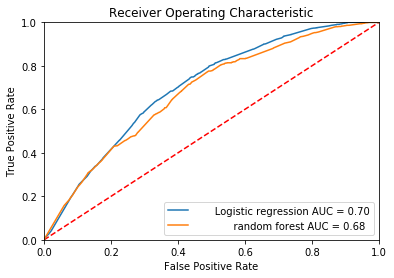

In [18]:
logistic_pred = best_C_model.predict_proba(X_test)[:,1]
rf_pred = rf_model.predict_proba(X_test)[:,1]
plot_roc(y_test, {"Logistic regression": logistic_pred, 'random forest':rf_pred})

### Conclusion:
It is clear our logistic regression performs better than random forest (a larger AUC value). It takes less time to train and it is also simpler to interpret and implement.

### 4G: furthur work
- feature engineering: derive features like how long the account is open, the hour/weekday of the transation etc..
- study interaction effects and correlation effects among some features
- spend more time on hyperparameter tuning in random forest and other complex models
- define a custom performance measure, use cost/benefit analysis to assign different weights on each misclassified label based on transaction amount, which error it is etc.. Use this custom measure to evaluate models